# S5 Assignment
## Overview

This ipynb is a solution to session 4, continuation of session 4. models.py and utils.py are imported accordingly where needed.

### Import Packages

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

### Select the runtime device

Added mps here to run code on macbook

In [28]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device=", device)

### Defining train and test transforms

In [29]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1407,), (0.4081,))
    ])

### Loading train and test data

In [30]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)

### Setting up train and test loaders

In [31]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': False, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(train_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

### Code block to visualize a sample of training data

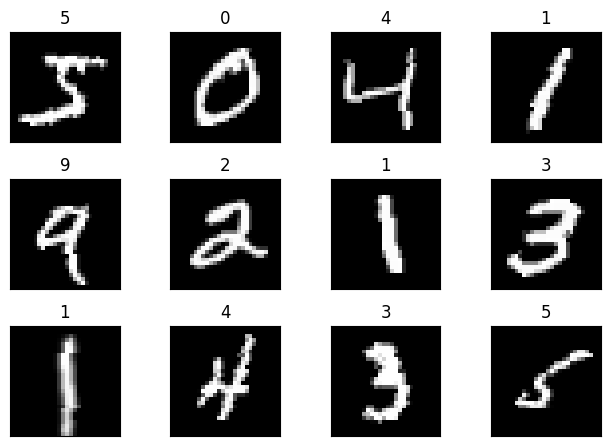

In [32]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

## Model import
### Imports model and shows a summary

In [39]:
import model
from model import Net

model = Net().to(device)
model.summary(input_size=(1,28,28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Net                                      [1, 28, 28]               [1, 10]                   --                             --
├─Conv2d: 1-1                            [1, 28, 28]               [32, 26, 26]              320                         0.05%
├─Conv2d: 1-2                            [32, 26, 26]              [64, 24, 24]              18,496                      3.12%
├─Conv2d: 1-3                            [64, 12, 12]              [128, 10, 10]             73,856                     12.45%
├─Conv2d: 1-4                            [128, 10, 10]             [256, 8, 8]               295,168                    49.76%
├─Linear: 1-5                            [1, 4096]                 [1, 50]                   204,850                    34.53%
├─Linear: 1-6                            [1, 50]                   [1, 10]                   510               

### Defining arrays to get plot, stats of the model

In [ ]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

## Importing utils package

In [48]:
from utils import train, test, plot_results

## Initiating training

In [45]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  #
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = F.cross_entropy
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)  #
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.4404 Batch_id=117 Accuracy=53.22: 100%|██████████| 118/118 [00:26<00:00,  4.50it/s]


Test set: Average loss: 0.3200, Accuracy: 53936/60000 (89.89%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2458 Batch_id=117 Accuracy=93.69: 100%|██████████| 118/118 [00:27<00:00,  4.30it/s]


Test set: Average loss: 0.1353, Accuracy: 57447/60000 (95.75%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.2295 Batch_id=117 Accuracy=96.31: 100%|██████████| 118/118 [00:25<00:00,  4.71it/s]


Test set: Average loss: 0.1002, Accuracy: 58063/60000 (96.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.2116 Batch_id=117 Accuracy=97.15: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]


Test set: Average loss: 0.0872, Accuracy: 58371/60000 (97.28%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.1935 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:26<00:00,  4.51it/s]


Test set: Average loss: 0.0828, Accuracy: 58453/60000 (97.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1268 Batch_id=117 Accuracy=97.79: 100%|██████████| 118/118 [00:24<00:00,  4.82it/s]


Test set: Average loss: 0.0776, Accuracy: 58529/60000 (97.55%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.1684 Batch_id=117 Accuracy=97.99: 100%|██████████| 118/118 [00:26<00:00,  4.46it/s]


Test set: Average loss: 0.0598, Accuracy: 58865/60000 (98.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1074 Batch_id=117 Accuracy=98.22: 100%|██████████| 118/118 [00:26<00:00,  4.46it/s]


Test set: Average loss: 0.0546, Accuracy: 58964/60000 (98.27%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1666 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [00:25<00:00,  4.69it/s]


Test set: Average loss: 0.0506, Accuracy: 59055/60000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0932 Batch_id=117 Accuracy=98.47: 100%|██████████| 118/118 [00:26<00:00,  4.44it/s]


Test set: Average loss: 0.0443, Accuracy: 59161/60000 (98.60%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0721 Batch_id=117 Accuracy=98.56: 100%|██████████| 118/118 [00:26<00:00,  4.54it/s]


Test set: Average loss: 0.0417, Accuracy: 59206/60000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.1051 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:25<00:00,  4.64it/s]


Test set: Average loss: 0.0432, Accuracy: 59189/60000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0732 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:26<00:00,  4.49it/s]


Test set: Average loss: 0.0386, Accuracy: 59272/60000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0501 Batch_id=117 Accuracy=98.78: 100%|██████████| 118/118 [00:25<00:00,  4.61it/s]


Test set: Average loss: 0.0343, Accuracy: 59347/60000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0693 Batch_id=117 Accuracy=98.88: 100%|██████████| 118/118 [00:26<00:00,  4.52it/s]


Test set: Average loss: 0.0344, Accuracy: 59352/60000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0346 Batch_id=117 Accuracy=99.11: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]


Test set: Average loss: 0.0271, Accuracy: 59494/60000 (99.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0438 Batch_id=117 Accuracy=99.15: 100%|██████████| 118/118 [00:25<00:00,  4.68it/s]


Test set: Average loss: 0.0271, Accuracy: 59504/60000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0292 Batch_id=117 Accuracy=99.13: 100%|██████████| 118/118 [00:25<00:00,  4.67it/s]


Test set: Average loss: 0.0261, Accuracy: 59514/60000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0427 Batch_id=117 Accuracy=99.17: 100%|██████████| 118/118 [00:26<00:00,  4.47it/s]


Test set: Average loss: 0.0259, Accuracy: 59538/60000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0352 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [00:25<00:00,  4.55it/s]


Test set: Average loss: 0.0262, Accuracy: 59517/60000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.


### Plotting stats

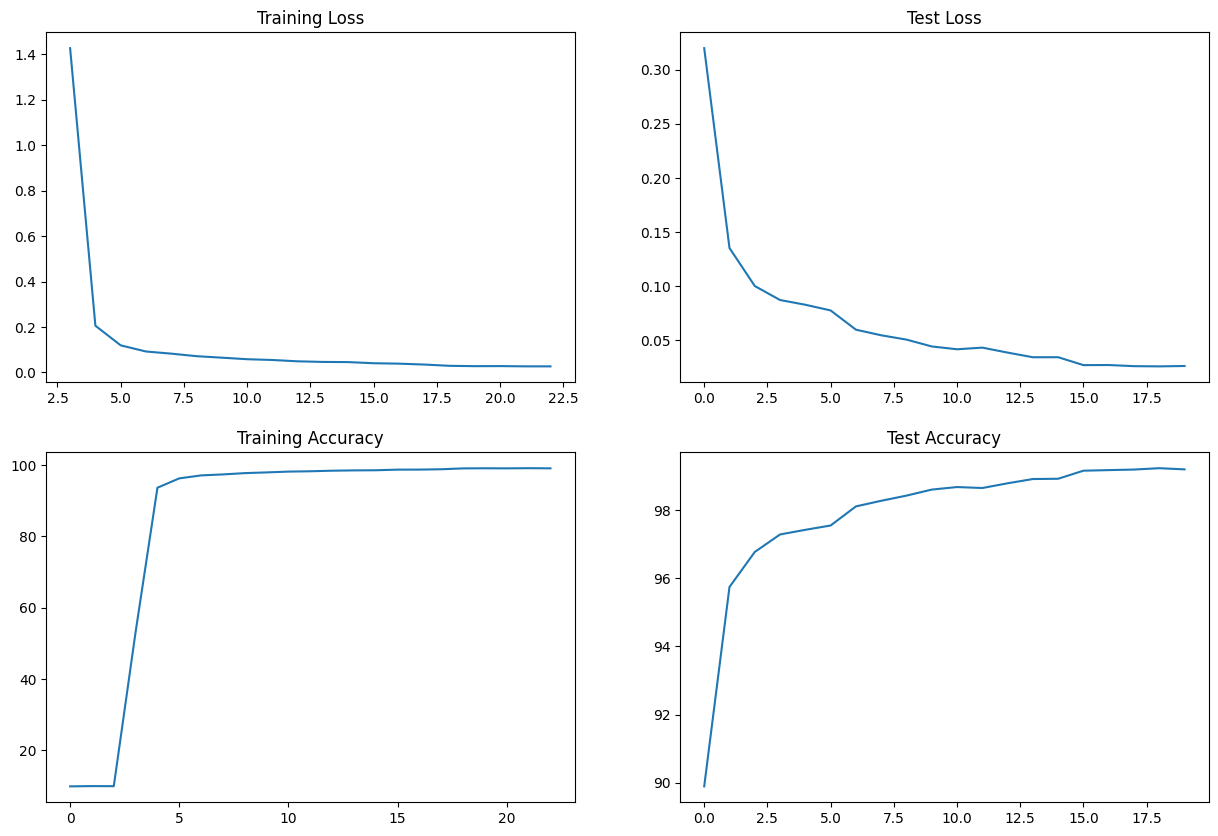

In [51]:
plot_results()